# Scraping and Analyzing Vivo T1 5G reviews from Flipkart

#### I came up with this project idea when my brother came to me and told me that he wanted to buy a new smartphone. He asked me to find him a good phone that would fit his budget, I did some research and I thought this product was the best choice so I decided to scrape the reviews of the product and do some analysis for fun.

Let's scrape the product reviews first.

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

reviewlist = []
pages = []
pages_to_scrape=197         #number of pages to scrape

for i in range(1,pages_to_scrape+1):
    url = ('https://www.flipkart.com/vivo-t1-5g-rainbow-fantasy-128-gb/product-reviews/itm594222523bd8f?pid=MOBGB9TYFQR3FQZT&page={}').format(i)      #adds +1 to the page count
    pages.append(url)
for item in pages:
    page = requests.get(item)
    soup = BeautifulSoup(page.text, 'html.parser')

    reviews = soup.find_all('div', attrs={'class' : 'col _2wzgFH K0kLPL'})

    for item in reviews:
        sub_row = item.find_all('div',attrs={'class':'row'})
        review = {
        'rating' : sub_row[0].find('div').text,
        'summary' : sub_row[0].find('p').text,
        'review' :sub_row[1].find('div').text
        }
        reviewlist.append(review)




df = pd.DataFrame(reviewlist)
df.to_csv('vivot1.csv', index=False)


Let's load the dataset

In [130]:
import numpy as np
import pandas as pd 
import re
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight') # fivethirtyeight

import plotly.io as pio
pio.renderers
pio.renderers.default = "notebook_connected"

In [133]:
df = pd.read_csv('vivot1.csv')

In [134]:
df

,rating,summary,review
0,4,Good quality product,Overall the phone is a good purchase..I want t...
1,5,Terrific,Very nice performance.Camera quality goodBatte...
2,3,Fair,"Touch function is not smooth, Back button is n..."
3,4,Pretty good,Overall Nice phone!!Good display and battery b...
4,4,Wonderful,Good design and performance good .. Low light...
...,...,...,...
880,5,Simply awesome,BrilliantREAD MORE
881,5,Wonderful,The phone is very good.READ MORE
882,5,Brilliant,Battery - OKDisplay - OKPerformance - Mind blo...
883,5,Best in the market!,Excellent product ❤️ camera is so good and the...


In [135]:
df.isna().sum()

rating     0
summary    0
review     0
dtype: int64

Checking the rating count

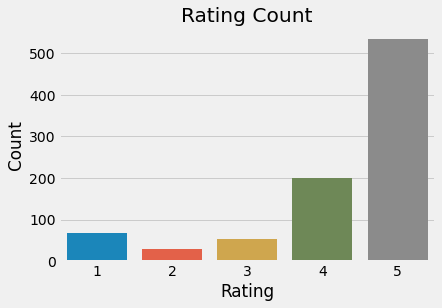

In [136]:
count = df.groupby(['rating']).count().reset_index()

fig =sns.barplot(x = 'rating',
            y = 'review',
            data = count)

fig.set(xlabel='Rating', ylabel='Count', title= 'Rating Count');


Let's analyze and visualize the data

In [137]:

def WordCloudForRating (dataFrame, rating):
    dff =  (dataFrame[df['rating'] == rating]['review'])
    corpus = ''
    
    for mem in dff:
        corpus += mem
    
    corpus = re.sub('READ MORE', '', corpus)
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey',
                          stopwords = stopwords,  min_font_size = 10).generate(corpus)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title(str(rating) + ' star reviews')
    plt.tight_layout(pad = 0) 
  
    

Let's check the most used words in the reviews based on ratings

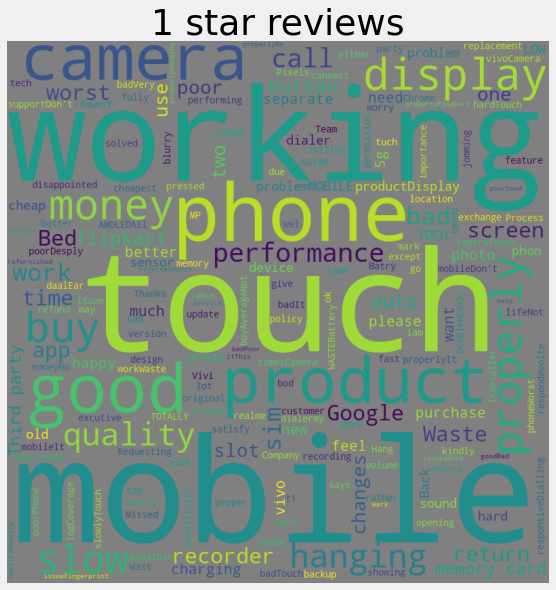

In [138]:
WordCloudForRating(df, 1)

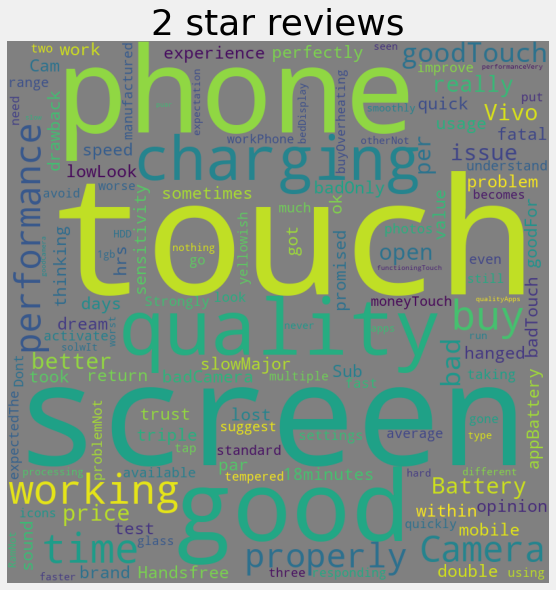

In [139]:
WordCloudForRating(df, 2)

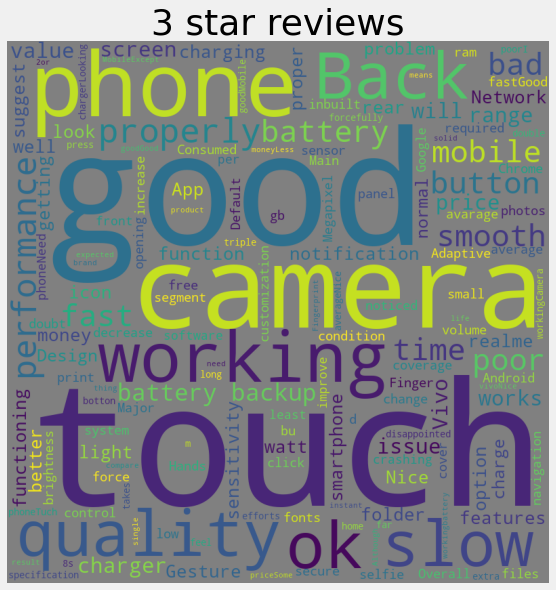

In [140]:
WordCloudForRating(df, 3)

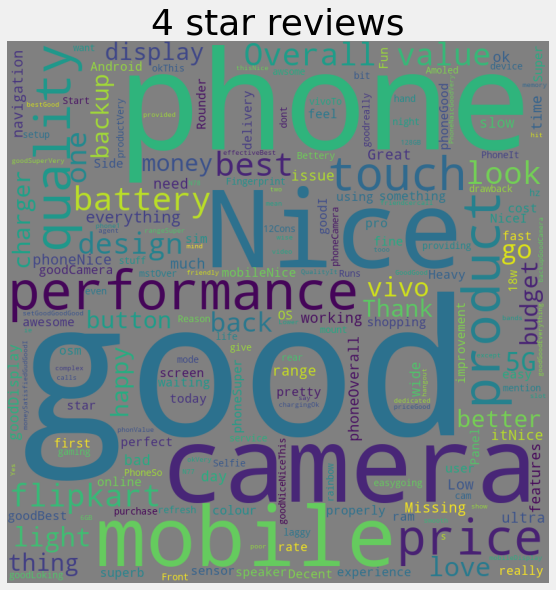

In [141]:
WordCloudForRating(df, 4)

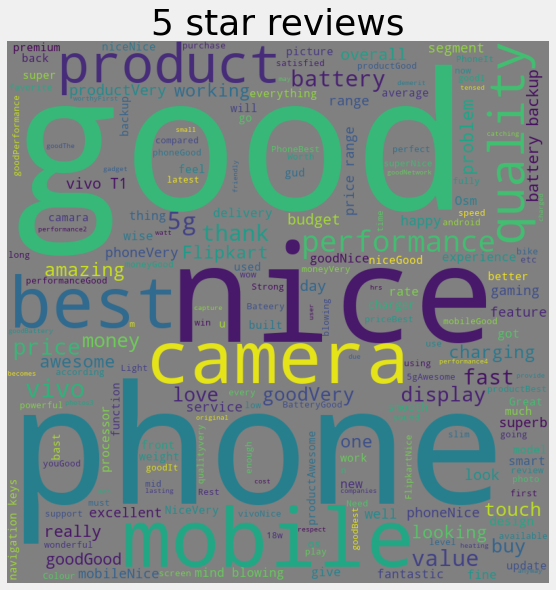

In [142]:
WordCloudForRating(df, 5)

In [143]:
from collections import Counter
from nltk.corpus import stopwords as st

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in st.words("english")]
    plt.barh(range(20), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.yticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]))
    plt.title(title)
    plt.show()

Let's check the count of most used words in the reviews

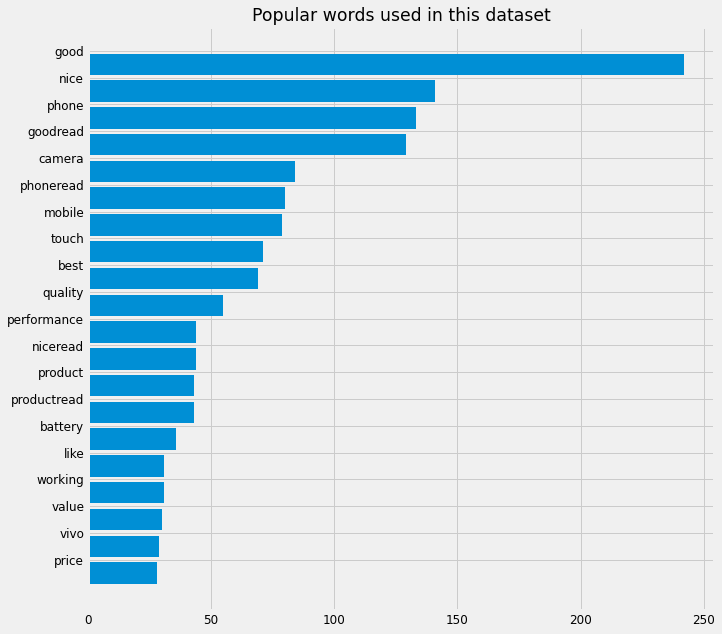

In [144]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 12})
wordBarGraphFunction(df,'review',"Popular words used in this dataset")

Let's check the titles of the reviews based on ratings

In [145]:
def WordCloudSummary (dataFrame, rating):
    dff =  (dataFrame[df['rating'] == rating]['summary'])
    corpus = ''
    
    for mem in dff:
        corpus += mem
    
    corpus = re.sub('READ MORE', '', corpus)
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey',
                          stopwords = stopwords,  min_font_size = 10).generate(corpus)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title(str(rating) + ' star review titles')
    plt.tight_layout(pad = 0) 

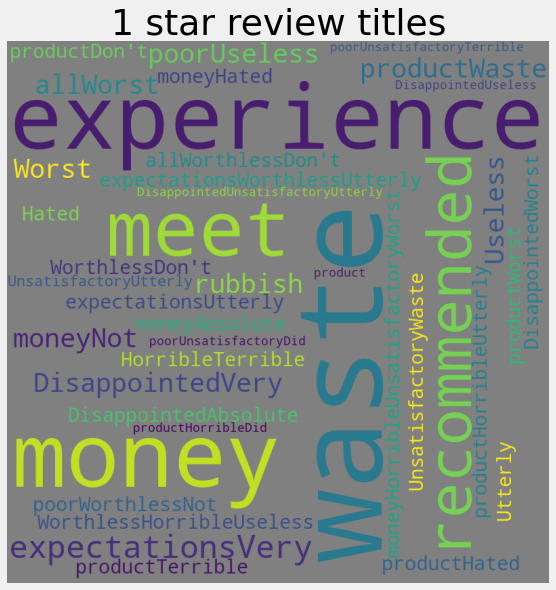

In [146]:
WordCloudSummary(df, 1)

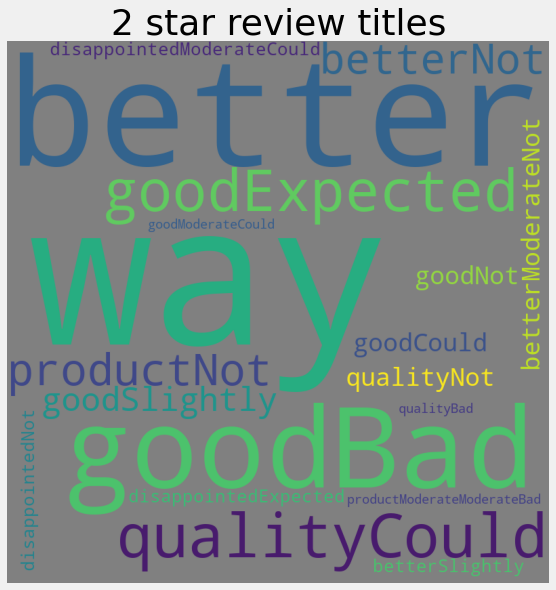

In [147]:
WordCloudSummary(df, 2)

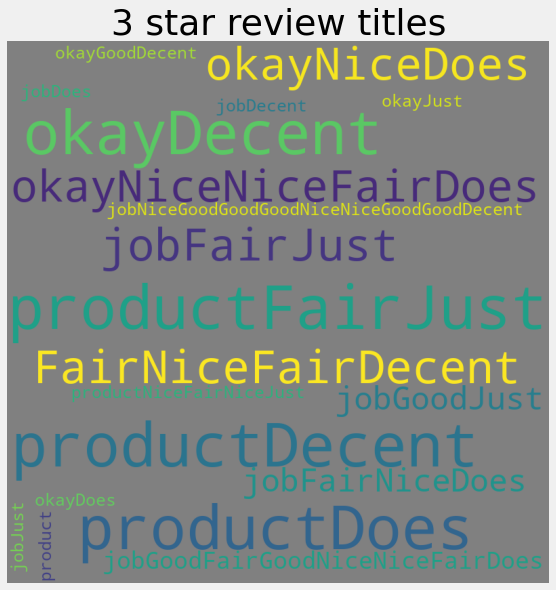

In [148]:
WordCloudSummary(df, 3)

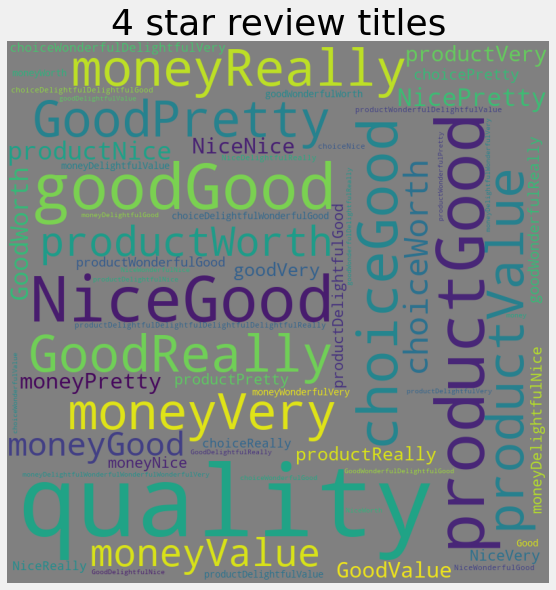

In [149]:
WordCloudSummary(df, 4)

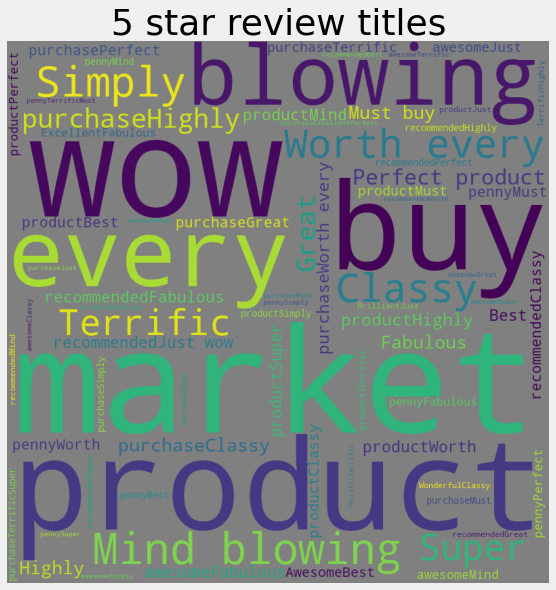

In [150]:
WordCloudSummary(df, 5)